In [13]:
import scipy as sp
import numpy as np
import pandas as pd 
import nltk
from IPython import display
 
# common model algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

#common model helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
 

#visiualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.tools.plotting import scatter_matrix

import warnings 
warnings.filterwarnings('ignore')

import time
%matplotlib inline 
mpl.style.use('ggplot')
sns.set_style('white')  


In [14]:
dataset=pd.read_csv("train_F3WbcTw.csv",encoding="ISO-8859-1")
dataset1=pd.read_csv("test_tOlRoBf.csv",encoding="ISO-8859-1")
data= [dataset,dataset1]
print(dataset.shape)
print(dataset1.shape)
dataset1['drug'].isna().sum()
 

(5279, 4)
(2924, 3)


0

In [15]:
label=LabelEncoder()
for set in data:
    set['drug_numerical']=label.fit_transform(set['drug'])
#dataset.groupby('drug').sum()
#Boolian_filter_positive_1= dataset.sentiment==0
#plt.bar_plot(dataset[Boolian_filter_positive_1].groupby('sentiment'))
dataset1['drug'].isna().sum()

0

In [16]:
#plotting bar_plot to see the proportion
#Boolian_filter_positive_1= dataset.drug==0

#list=dataset[Boolian_filter_positive_1].drug
#plt.bar(index,dataset[Boolian_filter_positive_1].groupby('drug'))
#plt.xlabel('drug',fontsize=10)
#plt.ylabel('label',fontsize=10)
#plt.xticks(list,fontsize=10,rotation=30)
#plt.title('Bar plot to see proportion of survival with respect to gender')

In [17]:
from wordcloud import STOPWORDS
print(STOPWORDS)
word_gen=[]
def gen_freq(text):
     
    for tw_words in text.split():
        word_gen.extend(tw_words)
    word_freq=pd.Series(word_gen).value_counts()
    word_freq=word_freq.drop(labels=STOPWORDS, errors='ignore')
    word_freq[:20]
    return word_freq


set(['all', "she'll", 'just', "don't", 'being', 'over', 'through', 'yourselves', 'its', 'before', 'how', "when's", "we've", 'had', 'should', "he'd", 'to', 'only', "there's", 'those', 'under', 'ours', 'has', "haven't", 'do', 'them', 'his', "they'll", 'get', 'very', "who's", "they'd", 'cannot', "you've", 'they', 'not', 'during', 'yourself', 'him', 'nor', "we'll", 'like', 'did', "they've", 'this', 'she', 'each', "won't", 'where', "mustn't", "isn't", "i'll", "why's", 'www', 'because', "you'd", 'doing', 'some', 'up', 'are', 'further', 'ourselves', 'out', 'what', 'for', 'since', 'while', "wasn't", 'does', "shouldn't", 'above', 'between', 'ever', 'ought', 'be', 'we', 'who', "you're", 'were', 'however', 'here', 'hers', "aren't", 'by', 'both', 'about', 'would', 'of', 'could', "he's", 'against', "i'd", "weren't", "i'm", 'com', 'or', "can't", 'otherwise', 'own', 'into', 'whom', 'down', "hadn't", "couldn't", "wouldn't", 'your', "doesn't", 'from', "how's", 'her', 'their', "it's", 'there', 'been', '

# Pre_processing of data (text cleaning)

In [18]:
import re
def text_clean(text):
    text=re.sub(r'RT','',text)
    text=re.sub(r'&amp;','&',text)
    text=re.sub(r'[;,?!@.#-*]','',text)
    text=text.lower()
    return text

In [19]:
from wordcloud import STOPWORDS
print(STOPWORDS)

set(['all', "she'll", 'just', "don't", 'being', 'over', 'through', 'yourselves', 'its', 'before', 'how', "when's", "we've", 'had', 'should', "he'd", 'to', 'only', "there's", 'those', 'under', 'ours', 'has', "haven't", 'do', 'them', 'his', "they'll", 'get', 'very', "who's", "they'd", 'cannot', "you've", 'they', 'not', 'during', 'yourself', 'him', 'nor', "we'll", 'like', 'did', "they've", 'this', 'she', 'each', "won't", 'where', "mustn't", "isn't", "i'll", "why's", 'www', 'because', "you'd", 'doing', 'some', 'up', 'are', 'further', 'ourselves', 'out', 'what', 'for', 'since', 'while', "wasn't", 'does', "shouldn't", 'above', 'between', 'ever', 'ought', 'be', 'we', 'who', "you're", 'were', 'however', 'here', 'hers', "aren't", 'by', 'both', 'about', 'would', 'of', 'could', "he's", 'against', "i'd", "weren't", "i'm", 'com', 'or', "can't", 'otherwise', 'own', 'into', 'whom', 'down', "hadn't", "couldn't", "wouldn't", 'your', "doesn't", 'from', "how's", 'her', 'their', "it's", 'there', 'been', '

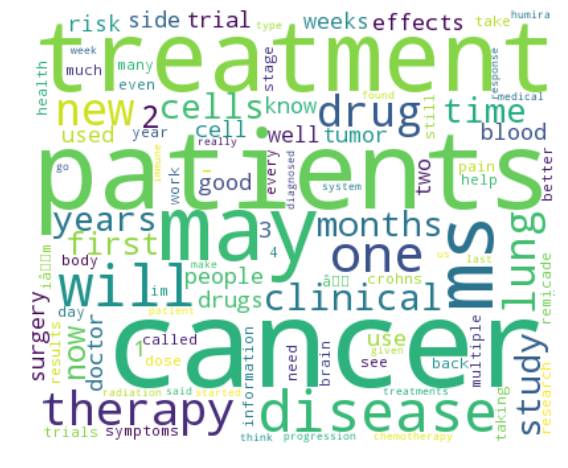

In [20]:
for set in data:
    text=set.text.apply(lambda(x):text_clean(x))
    word_freq=gen_freq(text.str)
    word_freq=word_freq.drop(labels=STOPWORDS, errors='ignore')

wc=WordCloud(width=400, height=330, max_words=100, background_color='white').generate_from_frequencies(word_freq)
plt.figure(figsize=(12,8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [21]:
for index, tweet in enumerate(dataset["text"][10:15]):
    print(index+1,".",text)

(1, '.', 0       256 previously stable on natalizumab with 55 s...
1       on fingolimod and have been since december 201...
2       apparently its shingles :-/ i do have a few re...
3       if the docetaxel doing once a week x3 weeks th...
4       cc stelara worked in a matter of days for me i...
5       janssen biotech inc has just received fda appr...
6       i just had the â i thought things would be b...
7       dec26 2018 basha fowler i was diagnosed in the...
8       hi i started gilenya about 7 weeks ago and hav...
9       my uncle is still going through treatment 2 ki...
10      my daughter has stage 4 adenocarcinoma nsclc r...
11      hi nt99 toxicity would probably be the main ob...
12      thanks jim thanks again janine    the kidney f...
13      hey ipoop i tried clicking that link and it di...
14      bad lifetime near-sightedness os -135 has led ...
15      janine have you ever heard of a kras mutation ...
16      "the important metric is brain volume loss" wh...
17   

In [22]:
import re

#Clean text from noise
def clean_text(text):
    #Filter to allow only alphabets
    text = re.sub(r'[^a-zA-Z\']', ' ', text)
    
    #Remove Unicode characters
    text = re.sub(r'[^\x00-\x7F]+', '', text)
    
    #Convert to lowercase to maintain consistency
    text = text.lower()
       
    return text

In [23]:
for set in data:
    set['clean_text'] = set.text.apply(lambda x: clean_text(x))
dataset1.head()

,unique_hash,text,drug,drug_numerical,clean_text
0,9e9a8166b84114aca147bf409f6f956635034c08,"256 (previously stable on natalizumab), with 5...",fingolimod,33,previously stable on natalizumab with ...
1,e747e6822c867571afe7b907b51f0f2ca67b0e1a,On fingolimod and have been since December 201...,fingolimod,33,on fingolimod and have been since december ...
2,50b6d851bcff4f35afe354937949e9948975adf7,Apparently it's shingles! :-/ I do have a few ...,humira,39,apparently it's shingles i do have a few ...
3,7f82ec2176ae6ab0b5d20b5ffc767ac829f384ae,If the Docetaxel doing once a week x3 weeks th...,tagrisso,81,if the docetaxel doing once a week x weeks th...
4,8b37d169dee5bdae27060949242fb54feb6a7f7f,"CC, Stelara worked in a matter of days for me....",stelara,78,cc stelara worked in a matter of days for me ...


In [24]:
#Check whether a negation term is present in the text
def any_neg(words):
    for word in words:
        if word in ['n', 'no', 'non', 'not'] or re.search(r"\wn't", word):
            return 1
    else:
        return 0

#Check whether one of the 100 rare words is present in the text
def any_rare(words, rare_100):
    for word in words:
        if word in rare_100:
            return 1
    else:
        return 0

#Check whether prompt words are present
def is_question(words):
    for word in words:
        if word in ['when', 'what', 'how', 'why', 'who']:
            return 1
    else:
        return 0
def positive_word(words):
    for word in words:
        if word in ['good', 'very','amazing']:
            return 1
    else:
        return 0
    

In [25]:


 
#100 most rare words in the dataset
rare_100 = word_freq[-500:]
#Number of words in a tweet
for set in data:
    set['word_count'] = set.clean_text.str.split().apply(lambda x: len(x))
#Negation present or not
    set['any_neg'] = set.clean_text.str.split().apply(lambda x: any_neg(x))
#Prompt present or not
    set['is_question'] = set.clean_text.str.split().apply(lambda x: is_question(x))
#Any of the most 100 rare words present or not
    set['any_rare'] = set.clean_text.str.split().apply(lambda x: any_rare(x, rare_100))
#Character count of the tweet
    set['char_count'] = set.clean_text.apply(lambda x: len(x))
    set['positive_word'] = set.clean_text.str.split().apply(lambda x: positive_word(x))
 


In [26]:
dataset.head()

,unique_hash,text,drug,sentiment,drug_numerical,clean_text,word_count,any_neg,is_question,any_rare,char_count,positive_word
0,2e180be4c9214c1f5ab51fd8cc32bc80c9f612e0,Autoimmune diseases tend to come in clusters. ...,gilenya,2,38,autoimmune diseases tend to come in clusters ...,81,1,0,0,418,1
1,9eba8f80e7e20f3a2f48685530748fbfa95943e4,I can completely understand why youâd want t...,gilenya,2,38,i can completely understand why you d want t...,225,0,1,0,1216,1
2,fe809672251f6bd0d986e00380f48d047c7e7b76,Interesting that it only targets S1P-1/5 recep...,fingolimod,2,35,interesting that it only targets s p recep...,119,1,1,0,780,1
3,bd22104dfa9ec80db4099523e03fae7a52735eb6,"Very interesting, grand merci. Now I wonder wh...",ocrevus,2,64,very interesting grand merci now i wonder wh...,21,0,0,0,124,1
4,b227688381f9b25e5b65109dd00f7f895e838249,"Hi everybody, My latest MRI results for Brain ...",gilenya,1,38,hi everybody my latest mri results for brain ...,116,1,1,0,620,1


In [27]:
word_freq[:10]

cancer       13968
patients     12591
treatment    11107
may           9883
ms            7904
disease       7091
will          6956
one           5635
therapy       5449
new           5236
dtype: int64

In [28]:
dataset.head()

,unique_hash,text,drug,sentiment,drug_numerical,clean_text,word_count,any_neg,is_question,any_rare,char_count,positive_word
0,2e180be4c9214c1f5ab51fd8cc32bc80c9f612e0,Autoimmune diseases tend to come in clusters. ...,gilenya,2,38,autoimmune diseases tend to come in clusters ...,81,1,0,0,418,1
1,9eba8f80e7e20f3a2f48685530748fbfa95943e4,I can completely understand why youâd want t...,gilenya,2,38,i can completely understand why you d want t...,225,0,1,0,1216,1
2,fe809672251f6bd0d986e00380f48d047c7e7b76,Interesting that it only targets S1P-1/5 recep...,fingolimod,2,35,interesting that it only targets s p recep...,119,1,1,0,780,1
3,bd22104dfa9ec80db4099523e03fae7a52735eb6,"Very interesting, grand merci. Now I wonder wh...",ocrevus,2,64,very interesting grand merci now i wonder wh...,21,0,0,0,124,1
4,b227688381f9b25e5b65109dd00f7f895e838249,"Hi everybody, My latest MRI results for Brain ...",gilenya,1,38,hi everybody my latest mri results for brain ...,116,1,1,0,620,1


In [64]:
X2_train = dataset.loc[:, 'clean_text'].values
y2_train = dataset.loc[:, 'sentiment'].values
X2_test = dataset1.loc[:, 'clean_text'].values


In [65]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
train_vectors = vectorizer.fit_transform(X2_train)
test_vectors = vectorizer.transform(X2_test)
print(train_vectors.shape, test_vectors.shape)
 

((5279, 36958), (2924, 36958))


In [66]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(train_vectors, y2_train)

In [75]:
from  sklearn.metrics  import f1_score
predicted = clf.predict(test_vectors)
print(predicted.shape)
datam=pd.DataFrame(predicted)
print(datam)

(2924L,)
      0
0     2
1     2
2     2
3     2
4     2
5     2
6     2
7     2
8     2
9     2
10    2
11    2
12    2
13    2
14    2
15    2
16    2
17    2
18    2
19    2
20    2
21    2
22    2
23    2
24    2
25    2
26    2
27    2
28    2
29    2
...  ..
2894  2
2895  2
2896  2
2897  2
2898  2
2899  2
2900  2
2901  2
2902  2
2903  2
2904  2
2905  2
2906  2
2907  2
2908  2
2909  2
2910  2
2911  2
2912  2
2913  2
2914  2
2915  2
2916  2
2917  2
2918  2
2919  2
2920  2
2921  2
2922  2
2923  2

[2924 rows x 1 columns]


In [74]:
output=pd.DataFrame(datam)
output.to_excel("output_sentiment_1.xlsx")

Splitting the dataset into Train-Test split The dataset is split into train and test sets so that we can evaluate our model's performance on unseen data. The model will only be trained on the train set and will make predictions on the test set whose data points the model has never seen. This will make sure that we have a proper way to test the model. This is a pretty regular practice in Machine Learning, don't worry if you are confused. It's just a way of testing your model's performance on unseen data.

In [29]:
from sklearn.model_selection import train_test_split
 

Train an ML model for Text Classification Now that the dataset is ready, it is time to train a Machine Learning model on the same. You will be using a Naive Bayes classifier from sklearn which is a prominent python library used for machine learning.

In [42]:
X = dataset[['word_count', 'any_neg', 'any_rare', 'char_count', 'is_question','drug_numerical','positive_word']]
y = dataset.sentiment
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05,random_state=100)
 

Evaluate the ML model It is time to train the model on previously unseen data: X_test and y_test sets that you previously created. Let's check the accuracy of the model.

In [43]:
X1_test=dataset1[['word_count', 'any_neg', 'any_rare', 'char_count', 'is_question','drug_numerical','positive_word']]
#Initialize GaussianNB classifier
model = ensemble.ExtraTreesClassifier()
#Fit the model on the train dataset
model = model.fit(X_train, y_train)
#Make predictions on the test dataset
pred = model.predict(X_test)
pred1 = model.predict(X1_test)

In [45]:
output=pd.DataFrame(pred1)
output.to_excel("output_sentiment_1.xlsx")

In [46]:
from sklearn.metrics import accuracy_score

print("Accuracy:", accuracy_score(y_test, pred)*100, "%")

('Accuracy:', 62.878787878787875, '%')


In [47]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

print("Accuracy:", f1_score(y_test, pred, average='macro'))
print("Accuracy:", f1_score(y_test, pred, average='micro'))
print("Accuracy:", f1_score(y_test, pred, average='weighted'))

('Accuracy:', 0.3457526156117705)
('Accuracy:', 0.6287878787878788)
('Accuracy:', 0.6104161436491781)


In [47]:
index_names=['AdaBoostClassifier',
    'BaggingClassifier',
    'ExtraTreesClassifier',
    'GradientBoostingClassifier',
    'RandomForestClassifier',
    
    # Gaussian Process
    'GaussianProcessClassifier',
    
    # General Linear models
    'LogisticRegressionCV',
    'PassiveAggressiveClassifier',
    'RidgeClassifierCV',
    'SGDClassifier',
    'Perceptron',
    
    # Naive Bayes
    'BernoulliNB',
    'GaussianNB',
    
    # Nearest Neighbour
    'KNeighborsClassifier',
    
    
    # SVM
     'svm.SVC',
    #'svm.NuSVC',
    
    # Trees
    'DecisionTreeClassifier',
    'ExtraTreeClassifier',
    
    # Descriminant Analysis 
    'LinearDiscriminantAnalysis',
    'QuadraticDiscriminantAnalysis',
    
    # XGBoost
    'XGBClassifier'
]
dataframe=[]
dataframe_cv=[]
accuracy_CV=[]

for i in range(len(MLA)):
    model=MLA[i].fit(X_train,y_train )
    test1_y_pred=model.predict(X_test)
    accuracy_CV.append(metrics.f1_score(y_test,test1_y_pred,average='macro'))
    dataframe_cv.append(test1_y_pred)
     
acc=pd.DataFrame(accuracy_CV)
acc.index=index_names
acc.columns=['Accuracy_CV']
out_cv=pd.DataFrame(dataframe_cv)
print(acc)

                               Accuracy_CV
AdaBoostClassifier                0.277286
BaggingClassifier                 0.372443
ExtraTreesClassifier              0.416574
GradientBoostingClassifier        0.310352
RandomForestClassifier            0.386266
GaussianProcessClassifier         0.350766
LogisticRegressionCV              0.276855
PassiveAggressiveClassifier       0.255917
RidgeClassifierCV                 0.277286
SGDClassifier                     0.323810
Perceptron                        0.277286
BernoulliNB                       0.277286
GaussianNB                        0.325396
KNeighborsClassifier              0.335832
svm.SVC                           0.276423
DecisionTreeClassifier            0.371550
ExtraTreeClassifier               0.361658
LinearDiscriminantAnalysis        0.277286
QuadraticDiscriminantAnalysis     0.330429
XGBClassifier                     0.277286


In [ ]:
from sklearn.naive_bayes import GaussianNB

#Initialize GaussianNB classifier
model = GaussianNB()
#Fit the model on the train dataset
model = model.fit(X_train, y_train)
#Make predictions on the test dataset
pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

print("Accuracy:", accuracy_score(y_test, pred)*100, "%")

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

print("Accuracy:", f1_score(y_test, pred, average='macro'))
print("Accuracy:", f1_score(y_test, pred, average='micro'))
print("Accuracy:", f1_score(y_test, pred, average='weighted'))

# Using word embedding with neaural network to predict sentiment